In [5]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle
import cv2

In [6]:
train_data = pd.read_csv("train.csv") 
test_data = pd.read_csv("test.csv")

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
y = train_data['label']

X = train_data.drop(columns = 'label')


smaller_X = X[:5000]
smaller_y = y[:5000]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)

In [82]:
#steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel="poly"))]
#pipeline = Pipeline(steps) 
#parameters = {'SVM__C':[0.001, 0.1, 100], 'SVM__gamma':[10,1,0.1,0.01]}
#grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)
#grid.fit(X_train, y_train)
#print(grid.score(X_test, y_test))
#print(grid.best_params_)
#pickle.dump(grid, open('all_data.pkl', 'wb'))

0.9734920634920635
{'SVM__C': 0.1, 'SVM__gamma': 0.01}


In [9]:
#pickle.dump(grid, open('model.pkl', 'wb'))


grid = pickle.load(open("all_data.pkl", "rb"))

In [10]:
y_pred = grid.predict(X_test)



In [11]:
print(accuracy_score(y_test, y_pred))

0.9734920634920635


In [12]:
print(confusion_matrix(y_test, y_pred))

[[590   0   3   0   1   0   4   0   2   0]
 [  0 674   2   0   1   1   1   1   0   0]
 [  0   1 631   2   4   2   0   0   5   1]
 [  1   0   1 690   0   8   0   4   9   6]
 [  1   0   1   0 615   0   3   1   0   8]
 [  0   0   0   7   1 503   2   0   3   0]
 [  3   1   0   0   0   4 587   0   3   0]
 [  0   1   4   1   2   0   0 651   1   7]
 [  1   0   3   3   2   4   0   2 601   0]
 [  0   1   3  10   8   1   0   9   6 591]]


In [15]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    print(temp)
    plt.imshow(temp)
    print("Label: ", y_train.iloc[row])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  88 167
  255 144  33   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   2 169 253 253
  182 248 204  48   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 121 253 224  13
    3   9  85  15   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  47 243 232  31   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2 125 253 142   4   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  89 253 248   

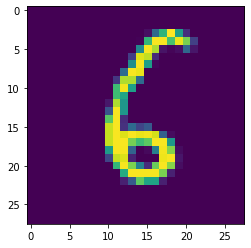

In [126]:
print_image(6, X_train)